# Import and Export of good and services

Imports and set magics:

In [2]:
#%pip install pandas-datareader
#%pip install git+https://github.com/alemartinello/dstapi
import numpy as np
import pandas as pd
import datetime

import pandas_datareader # install with `pip install pandas-datareader`
from dstapi import DstApi # install with `pip install git+https://github.com/alemartinello/dstapi`

import matplotlib.pyplot as plt
plt.rcParams.update({"axes.grid":True,"grid.color":"black","grid.alpha":"0.25","grid.linestyle":"--"})
plt.rcParams.update({'font.size': 14})


# Import

In [3]:
#Import UHM dataset for DST 
trade = DstApi('UHM') 

# Retrieve a summary of the table which contains variable names in English
tabsum = trade.tablesummary(language='en')
# Display the summary of the table.



#Define base parameters for the data retrieval
params = trade._define_base_params(language='en')  # Returns a view, that we can edit
params

# Print out the base parameters, set the values for the variables
variables = params['variables']
variables[0]['values'] = ['1.A']
variables[1]['values'] =['1']
variables[2]['values'] = ['W1']
variables[3]['values'] = ['93']
variables[4]['values'] = ['2']
variables[5]['values'] = ['2022M01', '2022M02', '2022M03', '2022M04', '2022M05', '2022M06', '2022M07', '2022M08', '2022M09', '2022M10', '2022M11', '2022M12',
'2023M01', '2023M02', '2023M03', '2023M04', '2023M05', '2023M06', '2023M07', '2023M08', '2023M09', '2023M10', '2023M11', '2023M12',
'2024M01', '2024M02']
params

# Use the modified parameters to get data from the trade API and store it
data = trade.get_data(params=params)
data.head(5)


Table UHM: External trade monthly by items, imports and exports, country, unit, seasonal adjustment and time
Last update: 2024-06-14T08:00:00


,POST,INDUD,LAND,ENHED,SÆSON,TID,INDHOLD
0,GOODS AND SERVICES,Imports,REST OF THE WORLD,Million DKK,Seasonally adjusted,2022M01,130136.0
1,GOODS AND SERVICES,Imports,REST OF THE WORLD,Million DKK,Seasonally adjusted,2022M02,128759.1
2,GOODS AND SERVICES,Imports,REST OF THE WORLD,Million DKK,Seasonally adjusted,2022M03,139396.8
3,GOODS AND SERVICES,Imports,REST OF THE WORLD,Million DKK,Seasonally adjusted,2022M04,144768.6
4,GOODS AND SERVICES,Imports,REST OF THE WORLD,Million DKK,Seasonally adjusted,2022M05,146745.8


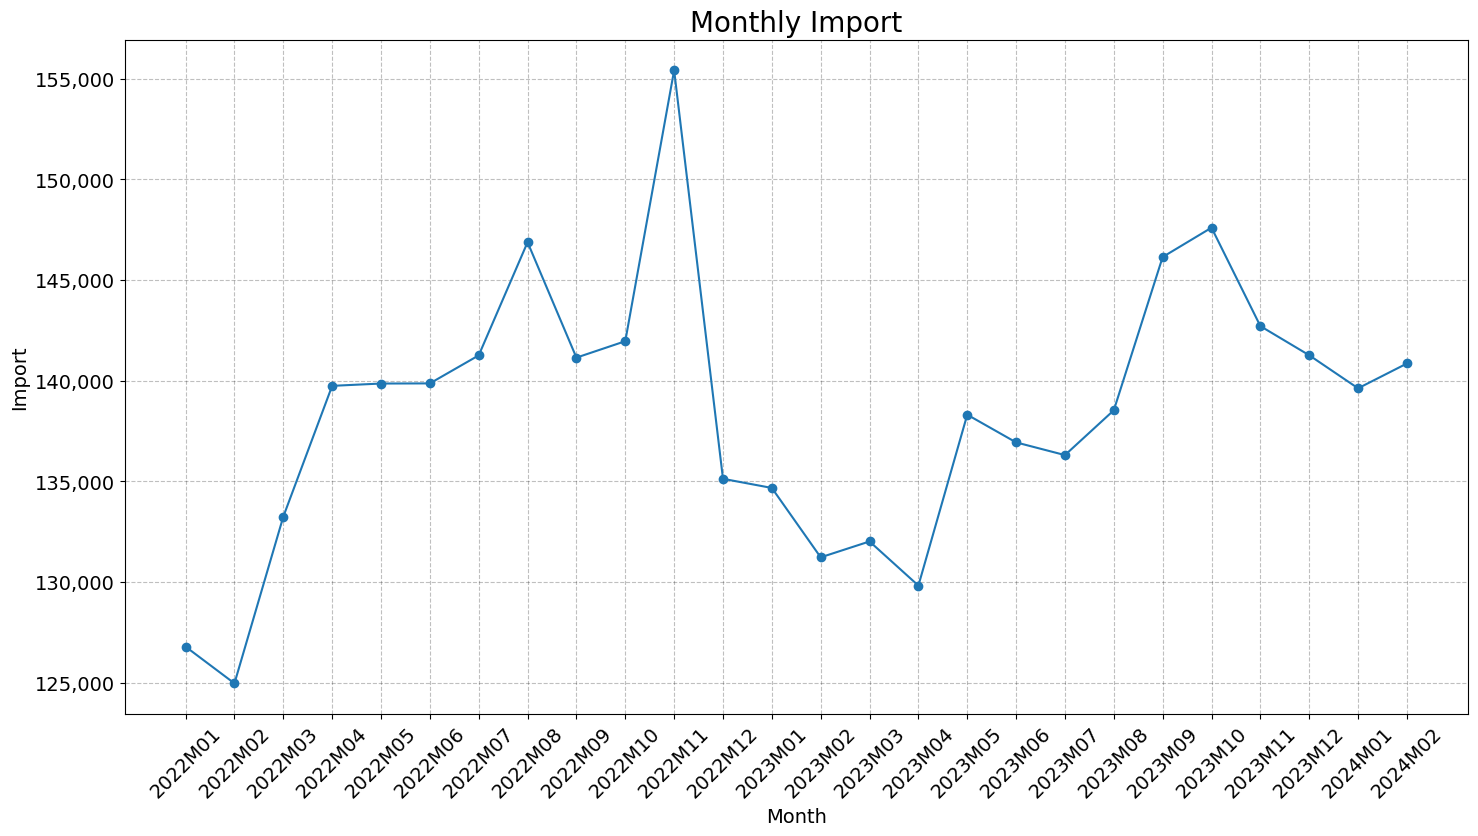

In [5]:
#Convert the values in the INDHOLD column to a numeric data type
data['INDHOLD'] = pd.to_numeric(data['INDHOLD'], errors='coerce').fillna(0).astype(int)

plt.figure(figsize=(15, 8))  # Set the size of the graph
plt.plot(data['TID'], data['INDHOLD'], marker='o')  # Plot the line graph with markers

# Format the y-axis labels with commas for thousands
plt.gca().get_yaxis().set_major_formatter(
    plt.matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.title('Monthly Import', fontsize=20)  # Set the title of the graph
plt.xlabel('Month', fontsize=14)  # Set the label for the x-axis
plt.ylabel('Import', fontsize=14)  # Set the label for the y-axis

plt.grid(True)  # Enable the grid
plt.tight_layout()  # Adjust the layout
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability

plt.show()  # Display the graph


The graph displays Denmark's seasonally adjusted monthly import values from November 2021 to February 2024, smoothing out periodic fluctuations to reveal underlying trends. A noteworthy feature is the pronounced volatility in imports month-to-month, suggesting responsive adjustments to economic conditions, policy changes, or shifts in global market dynamics. The most striking peak occurs in July 2022, where imports surge past 150,000 million DKK, hinting at either a temporary spike in demand for foreign goods and services or a reflection of broader economic expansion during that period.

Equally important are the distinct dips observed, particularly in December 2022 and August 2023, which could be attributed to factors such as domestic policy impacts, shifts in consumer behavior, or external economic shocks. The graph does not present a clear upward or downward long-term trajectory but rather a zigzag pattern, emphasizing the dynamic nature of import activity.

From an economic standpoint, these fluctuations are significant as they may influence Denmark's trade balance and, consequently, its currency valuation and fiscal policies. The lack of a persistent trend in either direction suggests that Denmark's economy has not consistently moved towards either a stronger reliance on imports or a drive towards import substitution.

# Export

In [4]:
#Import UHM dataset for DST 
Export = DstApi('UHM') 
# Retrieve a summary of the table which contains variable names in English
tabsum = Export.tablesummary(language='en')



#Define base parameters for the data retrieval
params = Export._define_base_params(language='en')  # Returns a view, that we can edit
params

# Print out the base parameters, set the values for the variables
variables = params['variables']
variables[0]['values'] = ['1.A']
variables[1]['values'] =['2']
variables[2]['values'] = ['W1']
variables[3]['values'] = ['93']
variables[4]['values'] = ['2']
variables[5]['values'] = ['2022M01', '2022M02', '2022M03', '2022M04', '2022M05', '2022M06', '2022M07', '2022M08', '2022M09', '2022M10', '2022M11', '2022M12',
'2023M01', '2023M02', '2023M03', '2023M04', '2023M05', '2023M06', '2023M07', '2023M08', '2023M09', '2023M10', '2023M11', '2023M12',
'2024M01', '2024M02']
params

# Use the modified parameters to get data from the trade API and store it
Export_data = Export.get_data(params=params)
Export_data.head(5)


Table UHM: External trade monthly by items, imports and exports, country, unit, seasonal adjustment and time
Last update: 2024-06-14T08:00:00


,POST,INDUD,LAND,ENHED,SÆSON,TID,INDHOLD
0,GOODS AND SERVICES,Exports,REST OF THE WORLD,Million DKK,Seasonally adjusted,2022M01,152222.4
1,GOODS AND SERVICES,Exports,REST OF THE WORLD,Million DKK,Seasonally adjusted,2022M02,154179.8
2,GOODS AND SERVICES,Exports,REST OF THE WORLD,Million DKK,Seasonally adjusted,2022M03,159174.1
3,GOODS AND SERVICES,Exports,REST OF THE WORLD,Million DKK,Seasonally adjusted,2022M04,162987.2
4,GOODS AND SERVICES,Exports,REST OF THE WORLD,Million DKK,Seasonally adjusted,2022M05,167179.9


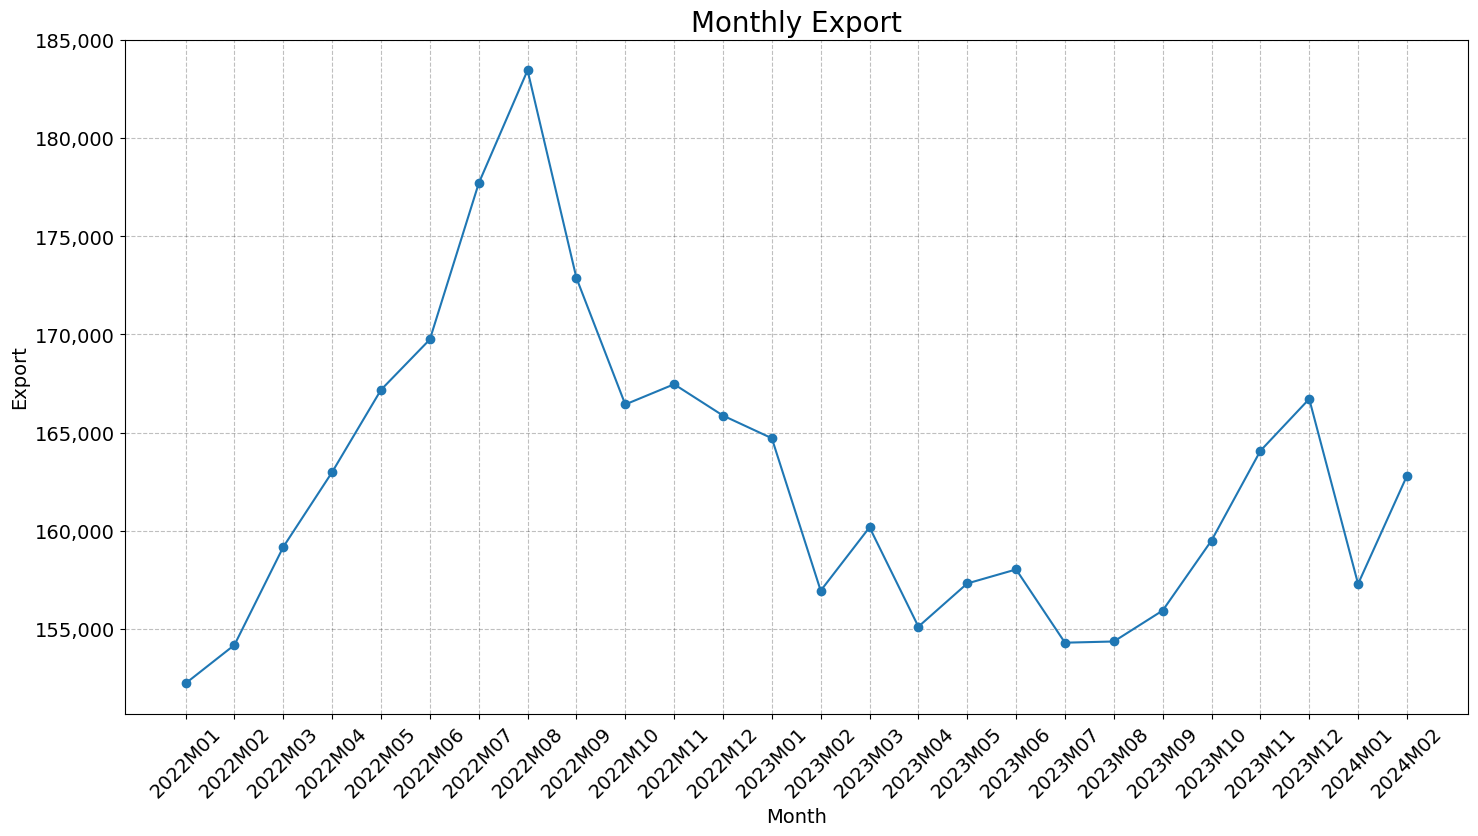

In [5]:
#Convert the values in the INDHOLD column to a numeric data type
Export_data['INDHOLD'] = pd.to_numeric(Export_data['INDHOLD'], errors='coerce').fillna(0).astype(int)

plt.figure(figsize=(15, 8))  # Set the size of the graph
plt.plot(Export_data['TID'], Export_data['INDHOLD'], marker='o')  # Plot the line graph with markers

# Format the y-axis labels with commas for thousands
plt.gca().get_yaxis().set_major_formatter(
    plt.matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.title('Monthly Export', fontsize=20)  # Set the title of the graph
plt.xlabel('Month', fontsize=14)  # Set the label for the x-axis
plt.ylabel('Export', fontsize=14)  # Set the label for the y-axis

plt.grid(True)  # Enable the grid
plt.tight_layout()  # Adjust the layout
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability

plt.show()  # Display the graph


This graph depicts Denmark's monthly export values of goods and services from November 2021 to February 2024, with the data being seasonally adjusted to account for periodic variations. Initial observations highlight a marked variability in export levels, which could be reflective of Denmark's economic resilience, adaptability to market conditions, and the competitiveness of Danish goods and services in the global market.

There is a sharp peak in export value in June 2022, where it reaches nearly 180,000 million DKK, potentially signifying a period of high economic activity or the fruition of favorable trade conditions or agreements. Following this peak, there is a significant decline, reaching its nadir around September 2022, which could be indicative of economic contraction, a temporary decrease in external demand, or issues such as production bottlenecks.

The overall pattern does not suggest a consistent long-term increase or decrease in export values but rather a series of rises and falls. This could point to the Danish economy's cyclical nature and its possible sensitivity to external economic shocks or seasonal industry patterns.

The rise in export values towards the end of the period, particularly noticeable in November 2023, may be a sign of economic recovery or an effective response to market opportunities. Considering Denmark's export strategy, this rebound could be the result of targeted economic policies or improved competitiveness in key sectors. The graph's implications for Denmark's trade balance are vital, as the relationship between import and export values can affect the country's current account balance.